# k-means clustering

## データの取得・確認

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# 分類を行うわけではないけど、わかりやすいのでIrisデータセットを使用
iris = datasets.load_iris()
iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_data.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## モデルの構築

In [2]:
class KMeans(object):
    """k-means (k平均法)."""

    def __init__(self, K, iter_nums=1000):
        """
        ---パラメータ-------
        K: クラスタ数
        iter_nums: 繰り返し回数
        --------------------

        """
        self.K = K
        self.iter_nums = iter_nums

    def fit(self, X):
        """クラスタリングを行う.
        
        X: データセット
        """
        # クラスタの重心の初期値をデータセットからランダムに選択
        centroids = X[np.random.choice(X.shape[0], self.K)]
        print(centroids)

        # 更新後のクラスタの重心とクラスタ情報を初期化しておく
        updated_centroids = np.zeros((self.K, X.shape[1]))
        cluster = np.zeros(X.shape[0])

        for _ in range(self.iter_nums):

            # 全サンプルに対して繰り返し
            for m in range(X.shape[0]):
                # データから各クラスタの重心までの距離を計算
                distances = np.sum((centroids - X[m]) ** 2, axis=1)

                # 最も距離の近かったものをデータの所属クラスタとして更新
                cluster[m] = np.argmin(distances)

            # すべてのクラスタに対して繰り返し
            for k in range(self.K):
                # クラスタ（1, 2, 3, ..., K）に属するデータ全ての平均値をとり、クラスタの重心を再計算
                updated_centroids[k] = X[cluster == k].mean(axis=0)

            centroids = updated_centroids
        return cluster


## 結果を可視化

### クラスタ数2個

In [3]:
cluster = KMeans(2).fit(iris_data.values)
cluster


[[4.8 3.1 1.6 0.2]
 [5.1 3.4 1.5 0.2]]


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Text(0.5, 1.0, 'k-means clustering result')

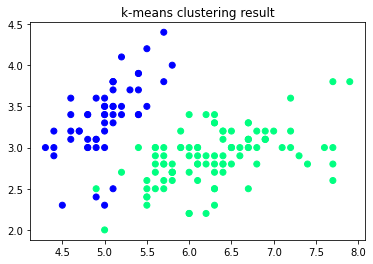

In [4]:
iris_data['cluster'] = cluster
plt.scatter(iris_data.iloc[:, 0], iris_data.iloc[:, 1], c=iris_data.loc[:, 'cluster'], cmap='winter')
plt.title('k-means clustering result')


### クラスタ数3個

In [5]:
cluster = KMeans(3).fit(iris_data.values)
cluster


[[5.2 3.5 1.5 0.2 0. ]
 [7.2 3.  5.8 1.6 1. ]
 [6.  3.4 4.5 1.6 1. ]]


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2.,
       2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2.,
       1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1.,
       2., 1., 2., 1., 2., 1., 1., 2., 2., 1., 1., 1., 1., 1., 2., 1., 1.,
       1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 2.])

Text(0.5, 1.0, 'k-means clustering result')

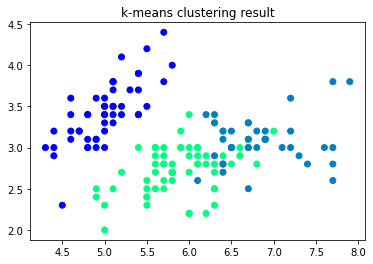

In [6]:
iris_data['cluster'] = cluster
plt.scatter(iris_data.iloc[:, 0], iris_data.iloc[:, 1], c=iris_data.loc[:, 'cluster'], cmap='winter')
plt.title('k-means clustering result')
